In [82]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
wine_data = pd.read_csv(github_url)
print('Wine Quality Dataset:')
print(wine_data.head())
display(wine_data)

Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [83]:
import pandas as pd

# Assuming redWine is a pandas DataFrame that has been previously loaded
quality_counts = wine_data['quality'].value_counts()
print(quality_counts)

wine_data['quality_binary'] = wine_data['quality'].apply(lambda x: 0 if x in [3, 4, 5] else (1 if x in [6, 7, 8] else None))

quality_binary_counts = wine_data['quality_binary'].value_counts()
print(quality_binary_counts)


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality_binary
1    855
0    744
Name: count, dtype: int64


In [84]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'redWine' is a pandas DataFrame and 'quality_binary' is a column in it
# Set the random seed
np.random.seed(123)

# Split the data into training and test sets
train_data, test_data = train_test_split(wine_data, test_size=0.3)

# Prepare the data for logistic regression
# Assuming 'quality' is a column to be excluded from the model
X_train = train_data.drop(columns=['quality', 'quality_binary'])
y_train = train_data['quality_binary']
X_test = test_data.drop(columns=['quality', 'quality_binary'])
y_test = test_data['quality_binary']

# Create and fit the logistic regression model
logistic_model_no_quality = LogisticRegression(max_iter=1000)
logistic_model_no_quality.fit(X_train, y_train)

# Print the summary of the model
# Note: There's no direct equivalent of R's summary function in sklearn; we print the coefficients instead
#print(logistic_model_no_quality.coef_)

# Make predictions on the test data
predictions_no_quality = logistic_model_no_quality.predict_proba(X_test)[:, 1]

# Convert probabilities to class predictions
predicted_classes_no_quality = (predictions_no_quality > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming test_data['quality_binary'] and predicted_classes_no_quality are defined
conf_matrix_no_quality = confusion_matrix(test_data['quality_binary'], predicted_classes_no_quality)
print(conf_matrix_no_quality)

accuracy_no_quality = accuracy_score(test_data['quality_binary'], predicted_classes_no_quality)
precision_no_quality = precision_score(test_data['quality_binary'], predicted_classes_no_quality)
recall_no_quality = recall_score(test_data['quality_binary'], predicted_classes_no_quality)
f1_score_no_quality = f1_score(test_data['quality_binary'], predicted_classes_no_quality)

print("Model without 'quality' - Accuracy:", accuracy_no_quality)
print("Model without 'quality' - Precision:", precision_no_quality)
print("Model without 'quality' - Recall:", recall_no_quality)
print("Model without 'quality' - F1 Score:", f1_score_no_quality)


[[158  74]
 [ 62 186]]
Model without 'quality' - Accuracy: 0.7166666666666667
Model without 'quality' - Precision: 0.7153846153846154
Model without 'quality' - Recall: 0.75
Model without 'quality' - F1 Score: 0.7322834645669292


In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_model_no_quality, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", np.mean(scores))


Cross-validated Accuracy: 0.7542560858424088


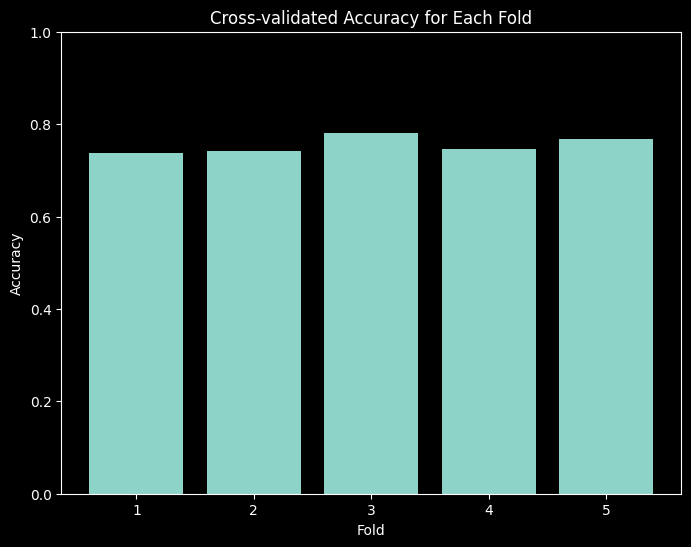

In [469]:
import matplotlib.pyplot as plt

# Perform cross-validation
scores = cross_val_score(logistic_model_no_quality, X_train, y_train, cv=5, scoring='accuracy')

# Create a bar plot of cross-validated accuracy for each fold
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores) + 1), scores)
plt.title('Cross-validated Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


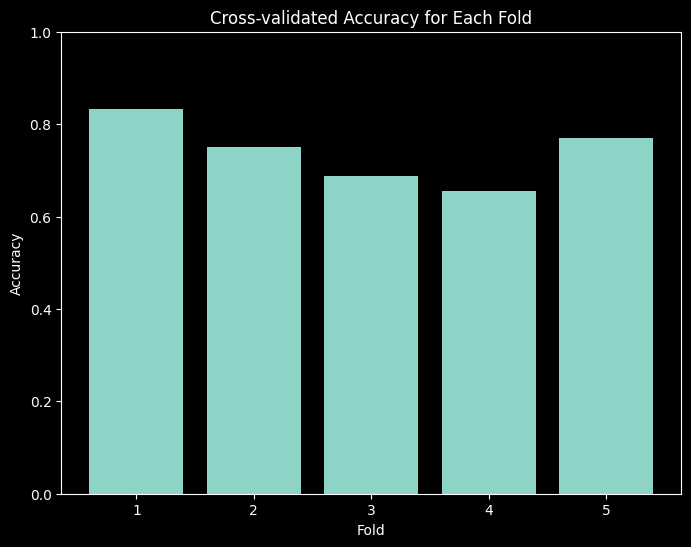

In [468]:
import matplotlib.pyplot as plt

# Perform cross-validation
scores = cross_val_score(logistic_model_no_quality, X_test, y_test, cv=5, scoring='accuracy')

# Create a bar plot of cross-validated accuracy for each fold
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(scores) + 1), scores)
plt.title('Cross-validated Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

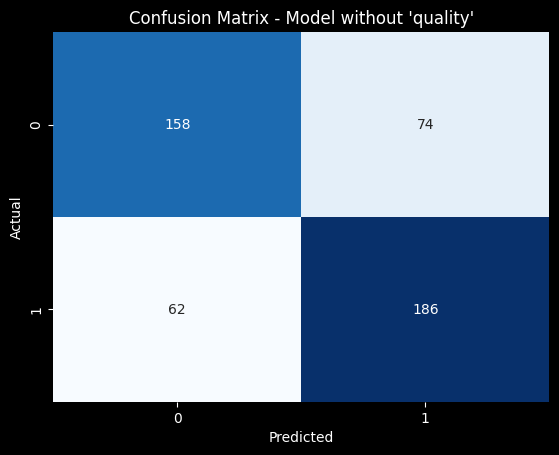

In [89]:
sns.heatmap(conf_matrix_no_quality, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model without \'quality\'')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

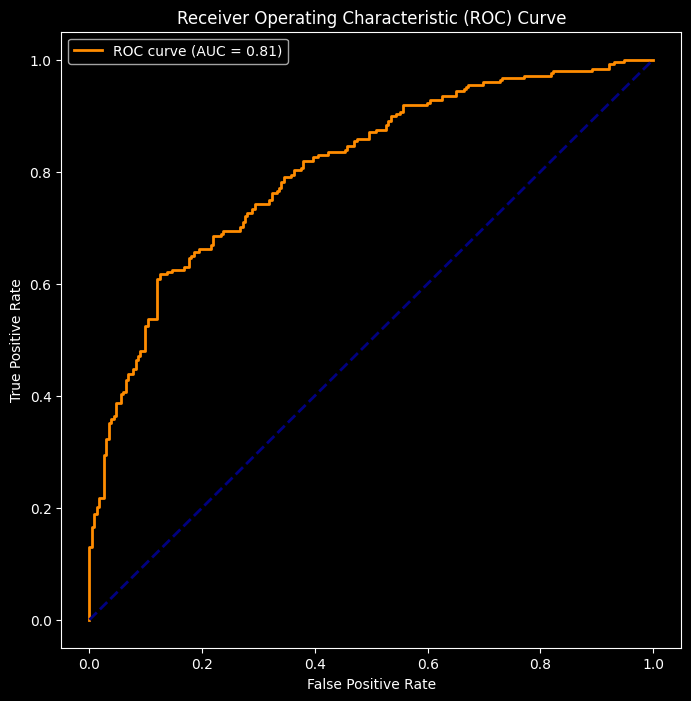

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming logistic_model is your fitted scikit-learn LogisticRegression model
# Assuming X_test is your test data and y_test is the corresponding true labels

# Predict probabilities
probabilities = logistic_model_no_quality.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


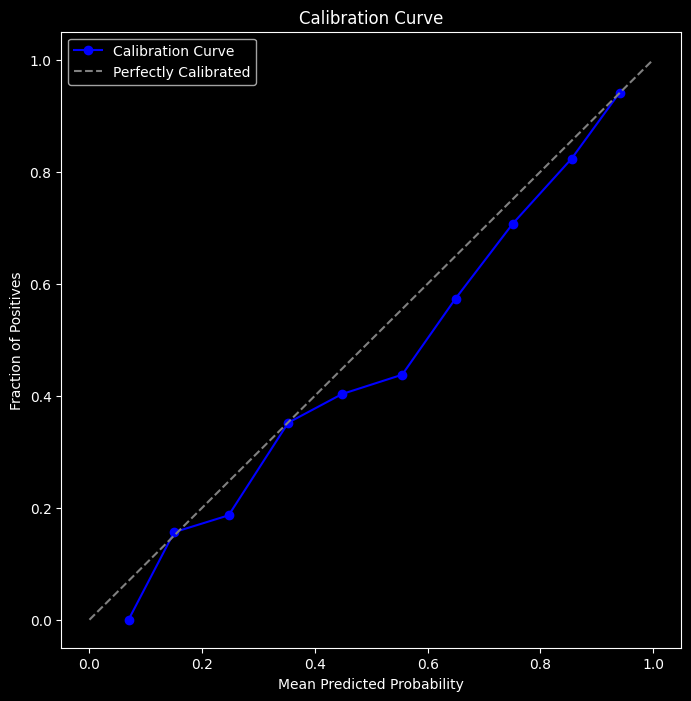

In [91]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, predictions_no_quality, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='b', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


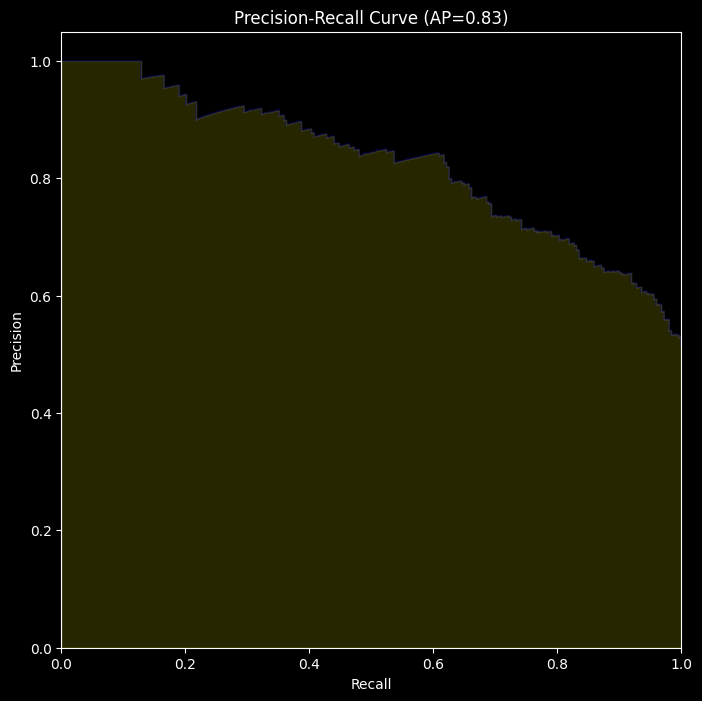

In [92]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve and area the curve
precision, recall, _ = precision_recall_curve(y_test, predictions_no_quality)
average_precision = average_precision_score(y_test, predictions_no_quality)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.show()
